In [ ]:
import pandas as pd
import datetime
import numpy as np
import os
import io
import time
import tensorflow as tf
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, RNN, LSTM, GRU, SimpleRNN
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from pandas import Series, DataFrame
import seaborn as sns

In [ ]:
df=pd.read_excel('/content/data_2 (1).xlsx')

In [ ]:
df=df[['flux_Mean', 'SM_Mean', 'Precipitation', 'LST', 'NDVI', 'ET','Level']]

In [ ]:
def preperdata(dataframe,seq_len,train_size=1500,val_size=300):
  data=df.values
  lenght=seq_len+1
  sc=MinMaxScaler()
  scaled_data=sc.fit_transform(data)
  x=[]
  for i in range(len(scaled_data)-lenght):
    x.append(scaled_data[i:i+lenght])
  X=np.array(x)
  x_train=X[:train_size,:-1,:]
  y_train=X[:train_size,-1,-1]
  x_val=X[train_size:train_size+val_size,:-1,:]
  y_val=X[train_size:train_size+val_size,-1,-1]
  x_test=X[train_size+val_size:,:-1,:]
  y_test=X[train_size+val_size:,-1,-1]
  print(x_train.shape)
  print(y_train.shape)
  print(x_val.shape)
  print(y_val.shape)
  print(x_test.shape)
  print(y_test.shape)
  return x_train, y_train, x_val, y_val, x_test, y_test

x_train, y_train, x_val, y_val, x_test, y_test =preperdata(df,30)

(1500, 30, 7)
(1500,)
(300, 30, 7)
(300,)
(272, 30, 7)
(272,)


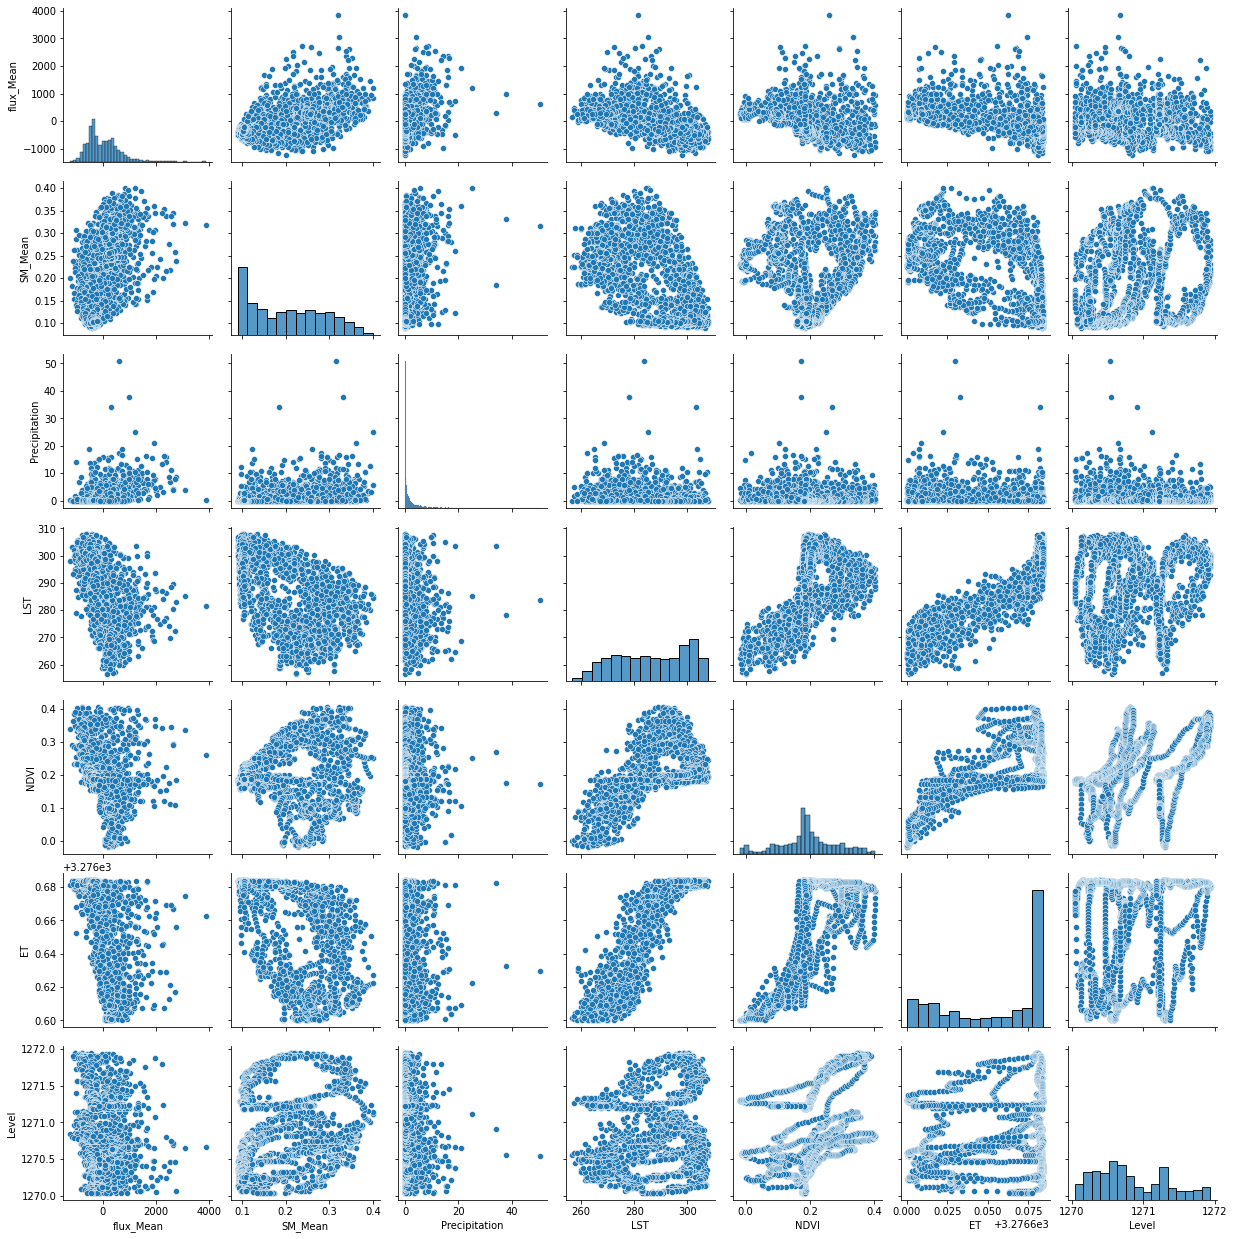

In [ ]:
sns.pairplot(df)

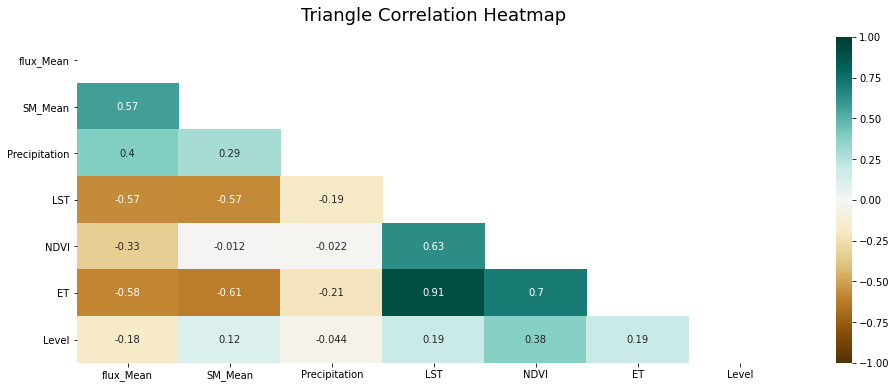

In [ ]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
checkpoint_dir=os.path.join(os.getcwd(),'train_check_point')
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_best_only=True)

In [ ]:
lstm=Sequential()
lstm.add(LSTM(128,input_shape=(x_train.shape[1],x_train.shape[2]),recurrent_dropout=0.2))
lstm.add(Dense(20))
lstm.add(Dense(1))
lstm.compile(loss='mse',optimizer='adam',metrics=['mse'])
history_lstm = lstm.fit(x_train, y_train, epochs=15, batch_size=32,
                    validation_data=(x_val, y_val),shuffle=False
                    )

Epoch 1/15
47/47 [==============================] - 8s 123ms/step - loss: 0.0421 - mse: 0.0421 - val_loss: 0.1092 - val_mse: 0.1092
Epoch 2/15
47/47 [==============================] - 5s 113ms/step - loss: 0.0359 - mse: 0.0359 - val_loss: 0.1281 - val_mse: 0.1281
Epoch 3/15
47/47 [==============================] - 5s 114ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 4/15
47/47 [==============================] - 5s 112ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 5/15
47/47 [==============================] - 5s 110ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 6/15
47/47 [==============================] - 5s 112ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 2.9198e-04 - val_mse: 2.9198e-04
Epoch 7/15
47/47 [==============================] - 5s 111ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 4.7528e-04 - val_mse: 4.7528e-04
Epoch 8/15
47/47 [==============================] - 5s 111ms

In [ ]:
lstm.evaluate(x_test, y_test)

9/9 [==============================] - 0s 11ms/step - loss: nan - mse: nan         


[nan, nan]

[]

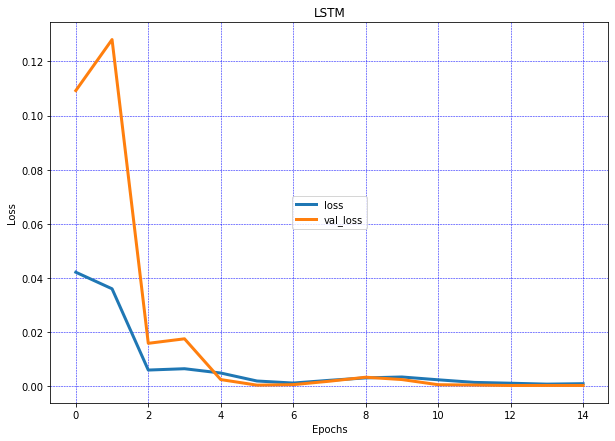

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(history_lstm.history['loss'], linewidth=3)
plt.plot(history_lstm.history['val_loss'], linewidth=3)
plt.title('LSTM')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['loss', 'val_loss'], loc=10)
plt.grid(color='b', linestyle='--', linewidth=0.5)
plt.plot()

In [ ]:
x_test[0,-1,-1]

0.8526315789473529

In [ ]:
x_test[0]

array([[3.44353082e-01, 7.60670220e-01, 8.66278154e-04, 3.89290741e-01,
        3.64493085e-01, 3.54561074e-01, 7.36842105e-01],
       [2.91558478e-01, 7.31972313e-01, 1.51598677e-03, 2.44672740e-01,
        3.75300709e-01, 3.85403983e-01, 7.42105263e-01],
       [2.67191370e-01, 7.07801742e-01, 4.91415971e-02, 5.00957929e-01,
        3.82870145e-01, 3.73583209e-01, 7.42105263e-01],
       [3.79778444e-01, 7.46337109e-01, 3.26488423e-01, 4.75602127e-01,
        3.90439582e-01, 3.61762436e-01, 7.47368421e-01],
       [3.41139986e-01, 7.42118470e-01, 2.35667034e-02, 4.59835393e-01,
        3.98009018e-01, 3.49941662e-01, 7.52631579e-01],
       [2.61832249e-01, 7.06450810e-01, 1.18128839e-03, 3.85703394e-01,
        4.05578454e-01, 3.38120889e-01, 7.52631579e-01],
       [2.44012884e-01, 6.83198440e-01, 1.33879351e-03, 4.07227479e-01,
        4.13147891e-01, 3.26300115e-01, 7.57894737e-01],
       [2.54994968e-01, 6.73676619e-01, 1.66167900e-02, 4.35163825e-01,
        4.20717327e-01, 3

In [ ]:
data=x_test[0].reshape(1,30,7)

In [ ]:
pred=[]
for i in range(len(x_test-1)):
    data=lstm.predict(x_test[i].reshape(1,30,7))
    pred.append(data)
    x_test[i+1,-1,-1]=data

In [ ]:
np.array(pred).reshape(-1,1)

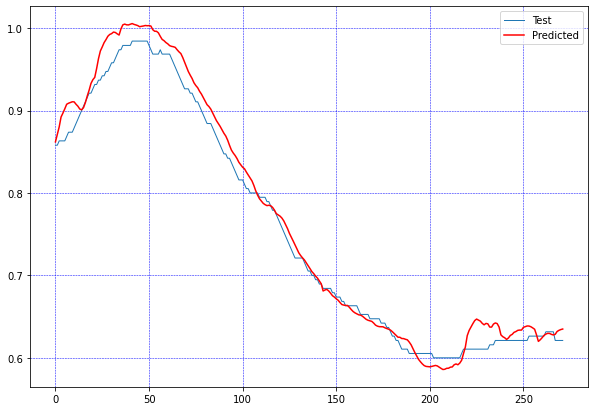

In [ ]:
y_predict = np.array(pred).reshape(-1,1)
plt.figure(figsize=(10,7))
plt.plot(y_test, linewidth=1)
plt.plot(y_predict, 'r-', markersize=3)
plt.legend(['Test', 'Predicted'], loc=0)
plt.grid(color='b', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
gru=Sequential()
gru.add(GRU(128,input_shape=(x_train.shape[1],x_train.shape[2]),recurrent_dropout=0.2))
gru.add(Dense(1))
gru.compile(loss='mse',optimizer='adam',metrics=['mse'])
history_gru = gru.fit(x_train, y_train, epochs=20, batch_size=32,
                    validation_data=(x_val, y_val),shuffle=False)

Epoch 1/20
47/47 [==============================] - 7s 111ms/step - loss: 0.0564 - mse: 0.0564 - val_loss: 0.1687 - val_mse: 0.1687
Epoch 2/20
47/47 [==============================] - 5s 102ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0889 - val_mse: 0.0889
Epoch 3/20
47/47 [==============================] - 5s 106ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 4/20
47/47 [==============================] - 5s 104ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 5/20
47/47 [==============================] - 5s 105ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 6/20
47/47 [==============================] - 5s 105ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 7/20
47/47 [==============================] - 5s 103ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 8/20
47/47 [==============================] - 5s 103ms/step - loss: 0.

In [ ]:
rnn.evaluate(x_test[:-10], y_test[:-10])

9/9 [==============================] - 0s 6ms/step - loss: 7.2419e-04 - mse: 7.2419e-04


[0.0007241929997690022, 0.0007241929997690022]

In [ ]:
gru.evaluate(x_test[:-10], y_test[:-10])

9/9 [==============================] - 0s 11ms/step - loss: 5.3757e-04 - mse: 5.3757e-04


[0.0005375733599066734, 0.0005375733599066734]

In [ ]:
lstm.evaluate(x_test[:-10], y_test[:-10])

9/9 [==============================] - 0s 12ms/step - loss: 2.1598e-04 - mse: 2.1598e-04


[0.0002159801806556061, 0.0002159801806556061]

[]

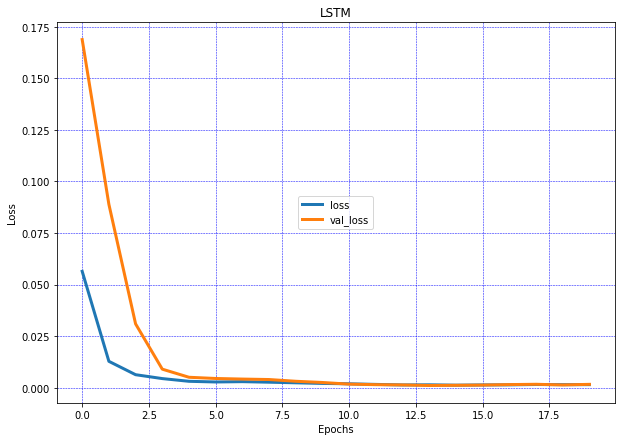

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(history_gru.history['loss'], linewidth=3)
plt.plot(history_gru.history['val_loss'], linewidth=3)
plt.title('LSTM')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['loss', 'val_loss'], loc=10)
plt.grid(color='b', linestyle='--', linewidth=0.5)
plt.plot()

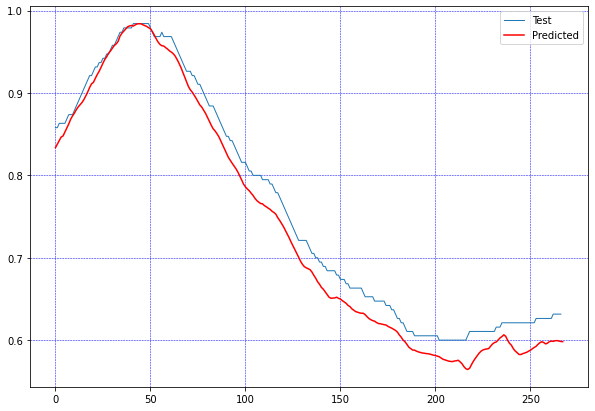

In [ ]:
y_predict = gru.predict(x_test)
plt.figure(figsize=(10,7))
plt.plot(y_test, linewidth=1)
plt.plot(y_predict, 'r-', markersize=3)
plt.legend(['Test', 'Predicted'], loc=0)
plt.grid(color='b', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
rnn=Sequential()
rnn.add(SimpleRNN(128,input_shape=(x_train.shape[1],x_train.shape[2]),recurrent_dropout=0.2))
rnn.add(Dense(1))
rnn.compile(loss='mse',optimizer='adam',metrics=['mse'])
history_rnn = rnn.fit(x_train, y_train, epochs=15, batch_size=32,
                    validation_data=(x_val, y_val),shuffle=False)

Epoch 1/15
47/47 [==============================] - 3s 40ms/step - loss: 0.1897 - mse: 0.1897 - val_loss: 0.1713 - val_mse: 0.1713
Epoch 2/15
47/47 [==============================] - 2s 34ms/step - loss: 0.0548 - mse: 0.0548 - val_loss: 0.0815 - val_mse: 0.0815
Epoch 3/15
47/47 [==============================] - 2s 35ms/step - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 4/15
47/47 [==============================] - 2s 35ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0586 - val_mse: 0.0586
Epoch 5/15
47/47 [==============================] - 2s 34ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 6/15
47/47 [==============================] - 2s 34ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 7/15
47/47 [==============================] - 2s 34ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 8/15
47/47 [==============================] - 2s 36ms/step - loss: 0.0071 - m

In [ ]:
rnn.evaluate(x_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: nan - mse: nan  


[nan, nan]

[]

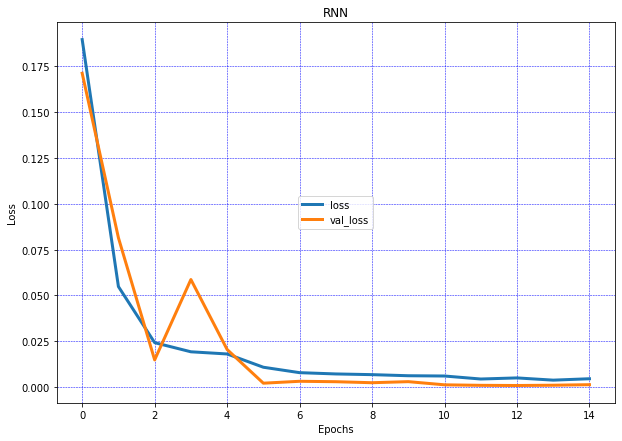

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(history_rnn.history['loss'], linewidth=3)
plt.plot(history_rnn.history['val_loss'], linewidth=3)
plt.title('RNN')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['loss', 'val_loss'], loc=10)
plt.grid(color='b', linestyle='--', linewidth=0.5)
plt.plot()

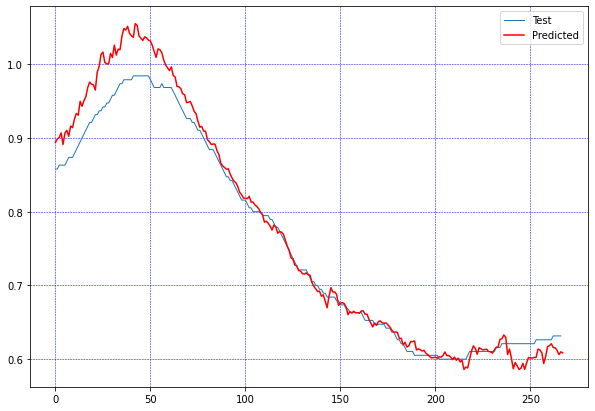

In [ ]:
y_predict = rnn.predict(x_test)
plt.figure(figsize=(10,7))
plt.plot(y_test, linewidth=1)
plt.plot(y_predict, 'r-', markersize=3)
plt.legend(['Test', 'Predicted'], loc=0)
plt.grid(color='b', linestyle='--', linewidth=0.5)
plt.show()